In [1]:
import os
import json
import pickle

In [2]:
def open_file(path):
    if 'pickle' in path:
        with open(path, 'rb') as f:
            out = pickle.load(f)
    elif 'json' in path:
        with open(path, 'r') as f:
            out = json.load(f)
    return out

In [3]:
attr = open_file('/media/jaeho/SSD/datasets/deepfashion/preprocessed_data/attr_cloth.pickle')

In [5]:
len(attr)

1000

In [8]:
target_img_dir = '/media/jaeho/SSD/datasets/deepfashion/img-001/'
data_dir = '/media/jaeho/SSD/datasets/deepfashion/category_and_attribute_prediction/category_and_attribute_prediction_benchmark/Anno_coarse'


In [28]:
attr_cloth_path = os.path.join(data_dir, 'list_attr_cloth.txt')
category_img_path = os.path.join(data_dir, 'list_category_img.txt')


In [14]:
att_map = {}
with open(attr_cloth_path, 'r') as f:
    cnt = 0
    idx = 0
    while True:
        line = f.readline()
        line = line.replace("\n", "")
        if not line : break
        if cnt<2 :
            if cnt == 0:
                print(f"number of attrs:{line}")
            cnt += 1
            continue
        splited_line = [x for x in [l.replace(" ", "") for l in line.split("  ")] if x != ""]
        attribute_name, attribute_type = splited_line
        
        att_map[idx] = attribute_name
        idx += 1

number of attrs:1000


In [13]:
cnt

2

In [16]:
len(att_map)

1000

In [17]:
cat = open_file('/media/jaeho/SSD/datasets/deepfashion/preprocessed_data/category_cloth.pickle')

In [19]:
len(cat)

50

In [20]:
cat

[{'category_name': 'Anorak', 'category_type': 1},
 {'category_name': 'Blazer', 'category_type': 1},
 {'category_name': 'Blouse', 'category_type': 1},
 {'category_name': 'Bomber', 'category_type': 1},
 {'category_name': 'Button-Down', 'category_type': 1},
 {'category_name': 'Cardigan', 'category_type': 1},
 {'category_name': 'Flannel', 'category_type': 1},
 {'category_name': 'Halter', 'category_type': 1},
 {'category_name': 'Henley', 'category_type': 1},
 {'category_name': 'Hoodie', 'category_type': 1},
 {'category_name': 'Jacket', 'category_type': 1},
 {'category_name': 'Jersey', 'category_type': 1},
 {'category_name': 'Parka', 'category_type': 1},
 {'category_name': 'Peacoat', 'category_type': 1},
 {'category_name': 'Poncho', 'category_type': 1},
 {'category_name': 'Sweater', 'category_type': 1},
 {'category_name': 'Tank', 'category_type': 1},
 {'category_name': 'Tee', 'category_type': 1},
 {'category_name': 'Top', 'category_type': 1},
 {'category_name': 'Turtleneck', 'category_type':

In [38]:
cat_map = {}
for idx, cat_label in enumerate(cat):
    cat_map[idx] = cat_label['category_name']

In [39]:
cat_map

{0: 'Anorak',
 1: 'Blazer',
 2: 'Blouse',
 3: 'Bomber',
 4: 'Button-Down',
 5: 'Cardigan',
 6: 'Flannel',
 7: 'Halter',
 8: 'Henley',
 9: 'Hoodie',
 10: 'Jacket',
 11: 'Jersey',
 12: 'Parka',
 13: 'Peacoat',
 14: 'Poncho',
 15: 'Sweater',
 16: 'Tank',
 17: 'Tee',
 18: 'Top',
 19: 'Turtleneck',
 20: 'Capris',
 21: 'Chinos',
 22: 'Culottes',
 23: 'Cutoffs',
 24: 'Gauchos',
 25: 'Jeans',
 26: 'Jeggings',
 27: 'Jodhpurs',
 28: 'Joggers',
 29: 'Leggings',
 30: 'Sarong',
 31: 'Shorts',
 32: 'Skirt',
 33: 'Sweatpants',
 34: 'Sweatshorts',
 35: 'Trunks',
 36: 'Caftan',
 37: 'Cape',
 38: 'Coat',
 39: 'Coverup',
 40: 'Dress',
 41: 'Jumpsuit',
 42: 'Kaftan',
 43: 'Kimono',
 44: 'Nightdress',
 45: 'Onesie',
 46: 'Robe',
 47: 'Romper',
 48: 'Shirtdress',
 49: 'Sundress'}

In [35]:
cat_imgs = open_file('/media/jaeho/SSD/datasets/deepfashion/preprocessed_data/category_img.pickle')

In [36]:
len(cat_imgs)

289222

In [45]:
with open('/media/jaeho/SSD/datasets/deepfashion/preprocessed_data/att_map.json', 'w') as f:
    json.dump(att_map, f, indent=2)
with open('/media/jaeho/SSD/datasets/deepfashion/preprocessed_data/cat_map.json', 'w') as f:
    json.dump(cat_map, f, indent=2)

In [48]:
import torch
import torch.nn as nn

In [47]:
vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True, verbose=False)

In [65]:
shape_stream = False

In [66]:
tmp_list = []
vgg_dict = {}
for name, child in vgg._modules['features'].named_children():
    if not isinstance(child, nn.MaxPool2d):
        tmp_list.append(child)
    else :
        num = len(vgg_dict) + 1
        if num == 5 and shape_stream:
            pass
        else :
            tmp_list.append(child)
        
        vgg_dict[f"conv{num}"] = tmp_list
        tmp_list = []
if shape_stream:
    vgg_dict[f"conv5_maxpool"] = [child]


In [67]:
vgg_dict

{'conv1': [Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace=True),
  Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace=True),
  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)],
 'conv2': [Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace=True),
  Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace=True),
  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)],
 'conv3': [Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace=True),
  Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace=True),
  Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace=True),
  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)],
 'conv4': [Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inpl

In [1]:
import sys
sys.path.append('../')

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [18]:
tr = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [19]:
dummy_tensor = torch.rand((3, 300, 300))

In [21]:
for t in tr.transforms:
    dummy_tensor = t(dummy_tensor)
    if isinstance(t, transforms.ToTensor):
        print('tensor')
    print(t)
    print()

ToPILImage()

Resize(size=(224, 224), interpolation=bilinear)

tensor
ToTensor()



In [22]:
dummy_tensor.shape

torch.Size([3, 224, 224])

In [1]:
import sys
sys.path.append('../')

In [2]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from dataset import TSDataset
from square_pad import SquarePad

import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

In [3]:
tf = transforms.Compose([
    SquarePad(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [4]:
dataset = TSDataset('/media/jaeho/SSD/datasets/deepfashion/split/train.pickle', transform=tf)

In [5]:
# dataloader = DataLoader(
#         dataset,
#         batch_size=256,
#         shuffle=True,
#         num_workers=10,
#         pin_memory=True
#     )

In [6]:
for batch_idx, (img_batch, _, _, visibility_batch, landmark_batch) in enumerate(dataset):
    break

In [7]:
img_batch.shape

torch.Size([3, 224, 224])

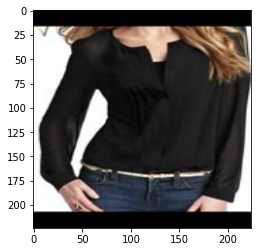

In [8]:
plt.imshow(transforms.ToPILImage()(img_batch))